<a href="https://colab.research.google.com/github/pripalazzo/Estatistica-com-R/blob/main/Analise_Estat%C3%ADsticaR_Testes_de_Hipoteses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estatística com R - Colab 
**Autora**: P. P

**Data:** Maio de 2022

**Laboratório - IGTI - Ciência de Dados**

*   # Teste t para diferença de médias (duas amostras independentes)
*   # Teste t para diferença de médias (duas amostras dependentes) 
*   # Teste Qui-Quadrado para associação entre variáveis categóricas
*   # ANOVA

In [109]:
rm(list = ls()) #Limpa memória do R

In [110]:
# Avaliando a normalidade de uma variável aleatória
set.seed(10)

In [111]:
# Gera v.a. que segue distribuição normal com n = 70, média = 40 e desvio padrão = 8
va_normal <- rnorm(n = 70, mean = 25, sd = 8)

In [112]:
# Gera v.a. que segue uma distribuição F (não normal) com n = 15, 2 graus de liberdade no numerados e 10 graus de liberdade no denominador
va_nao_normal <- rf(n =15, df1 =2, df2 = 10)

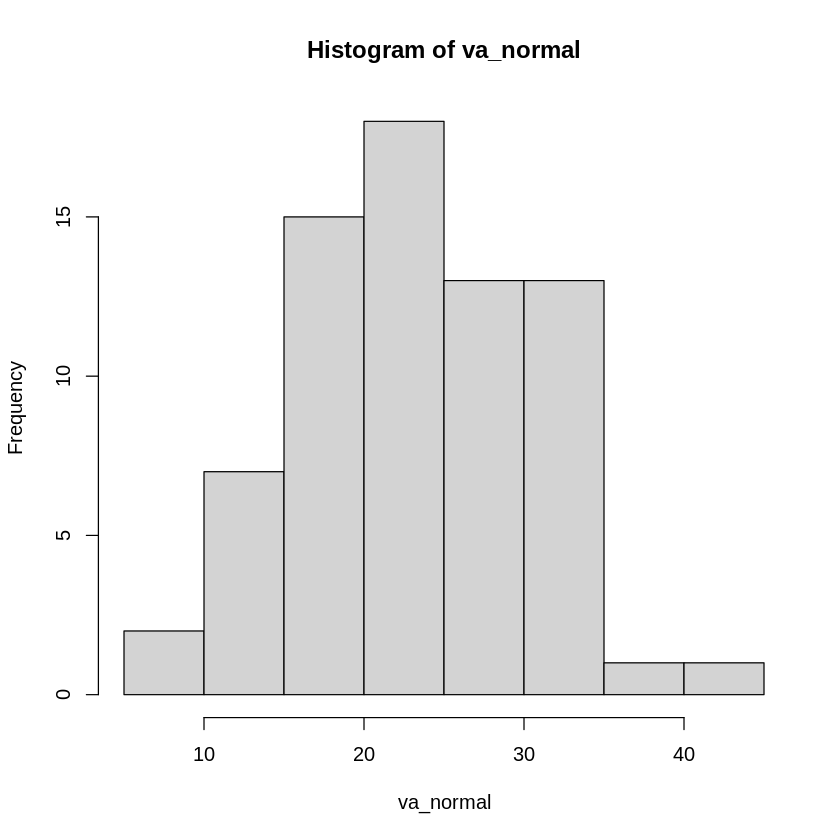

In [113]:
# Visualize o histograma das variáveis geradas
# Observe como os dados se distribuem em torno do valor médio na va normal
hist(va_normal)

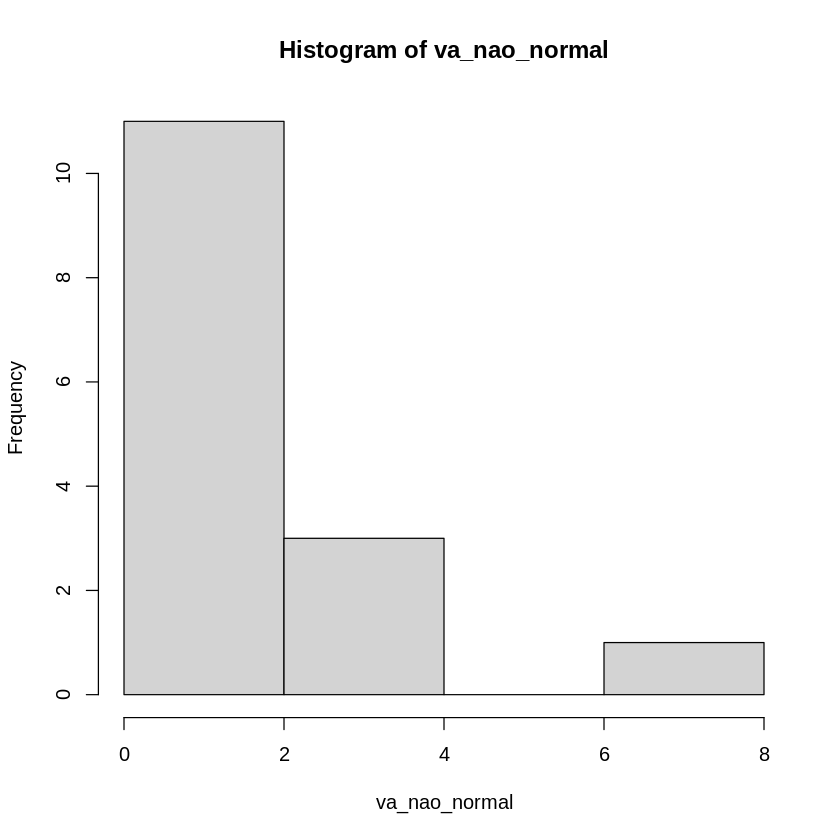

In [114]:
# Observe como os dados não se distribuem em torno de um valor médio exibindo padrão assimétrico
hist(va_nao_normal)

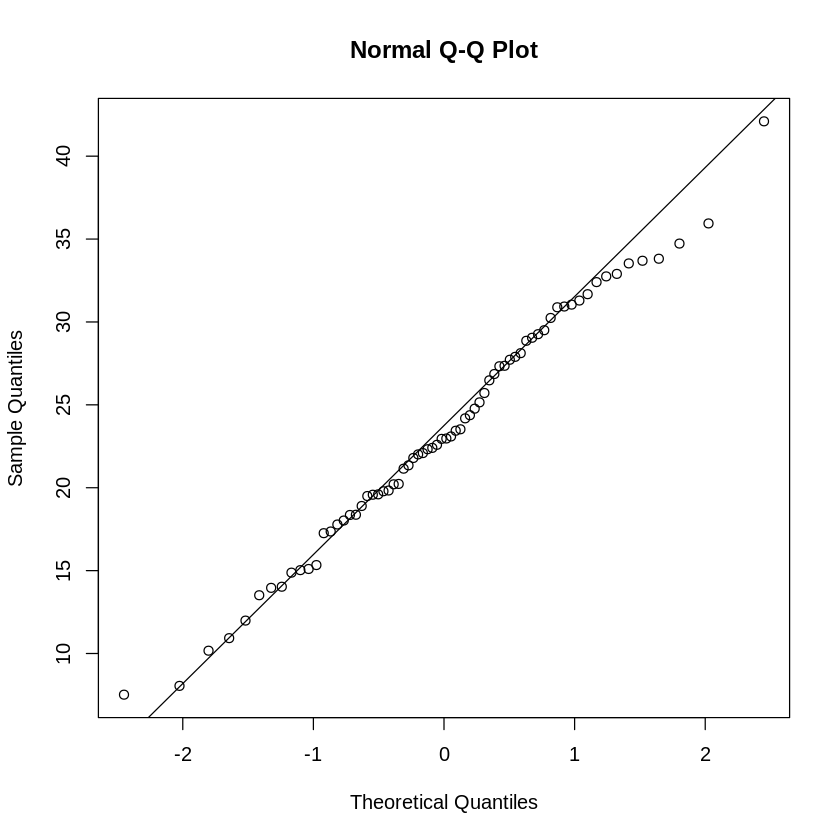

In [115]:
# Visualize o QQ-Plot - observe como os pontos de dados seguem a linha reta qq norm da va normal
qqnorm(va_normal)
qqline(va_normal) #Este comando é para adicionar a linha

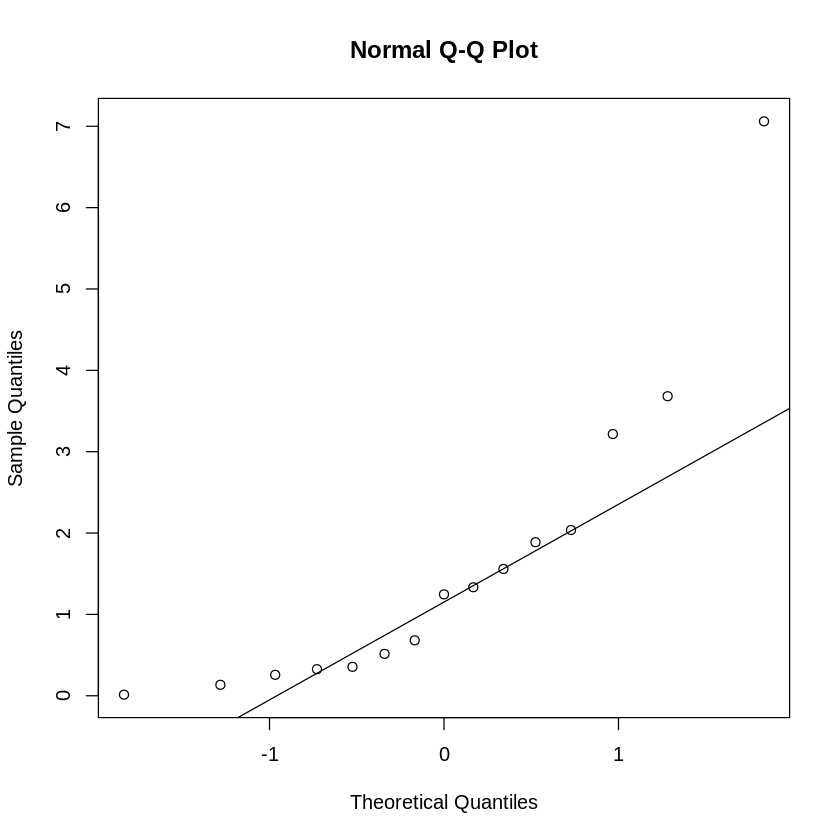

In [116]:
# Observe como os pontos de dados não seguem a linha reta na va não normal
qqnorm(va_nao_normal)
qqline(va_nao_normal) #Este comando é para adicionar a linha

In [117]:
# Vamos aplicar o teste de hipóteses Shapiro Wilk. O teste funciona sob as hipóteses
# H0: A variável segue uma distribuição normal
# H1: A variável não segue uma distribuição normal

# Fixe um nível de significância alfa e analise o p valor (p-value) do Shapiro Wilk

# Se o p-value for menor que alfa a hipótese nula deve ser rejeitada

In [118]:
shapiro.test(va_normal)

# Interpretação: Aceita-se H0


	Shapiro-Wilk normality test

data:  va_normal
W = 0.99041, p-value = 0.8742


In [119]:
shapiro.test(va_nao_normal)

# Interpretação: Rejeita-se H0, aceitando a H1 (hipótese nula)


	Shapiro-Wilk normality test

data:  va_nao_normal
W = 0.78348, p-value = 0.002274


# Teste t para diferença de médias (duas amostras independentes)

In [120]:
# Iremos testar se:
# H0: As vendas na posição A são iguais as Vendas na Posição B
# H1: As vendas na posição A são diferentes das vendas na posição B
mu1 <- 150.1 #Armazena as média de vendas na posição A
mu2 <- 182.1 #Armazena as média de vendas na posição B
s1 <- 17 #Armazena o desvio padrão das vendas na posição A
s2 <- 19.2 #Armazena o desvio padrão das vendas na posição B
n1 <- 25 #Armazena a quantidade observações registradas para de vendas na posição A
n2 <- 30 #Armazena a quantidade observações registradas para de vendas na posição B

In [121]:
# Calcula nossa estatística de teste. Que é o t calculado
t <- (mu1 - mu2) / sqrt( s1^2/n1 + s2^2/n2)
t #Visualize o valor de t calculado

[1] -6.552756

In [122]:
# Calcula os graus de liberdade da estatística de teste
gl <- (s1^2/n1 + s2^2/n2)^2 /( (s1^2/n1)^2 / (n1-1) + (s2^2/n2)^2 / (n2-1) )
gl #Visualize a quantidade de graus de liberdade

[1] 52.78313

In [123]:
# Obtem o quantil (t crítico) para uma distribuição t com gl graus de liberdade. A um alfa de 5%
quantil <- qt(0.975,df = gl)
quantil #Visualize o t crítico

[1] 2.005938

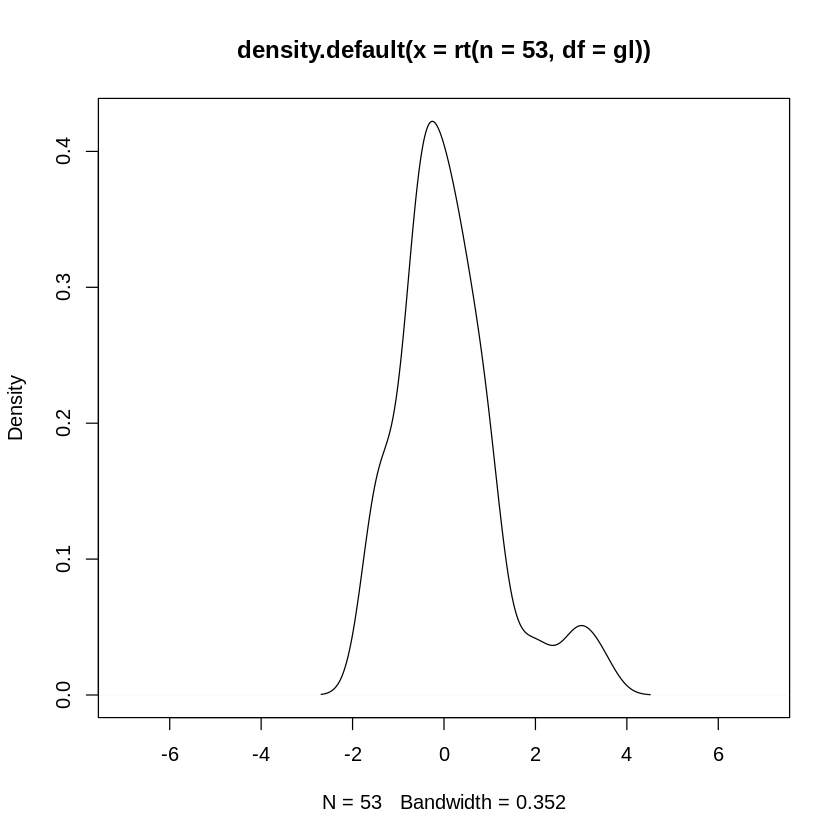

In [124]:
# Esse é o aspecto de uma distribuição t com n=53 observações e com n - 1 graus de liberdade
plot(density(rt(n = 53,df = gl)),xlim = c(-7,7)) 

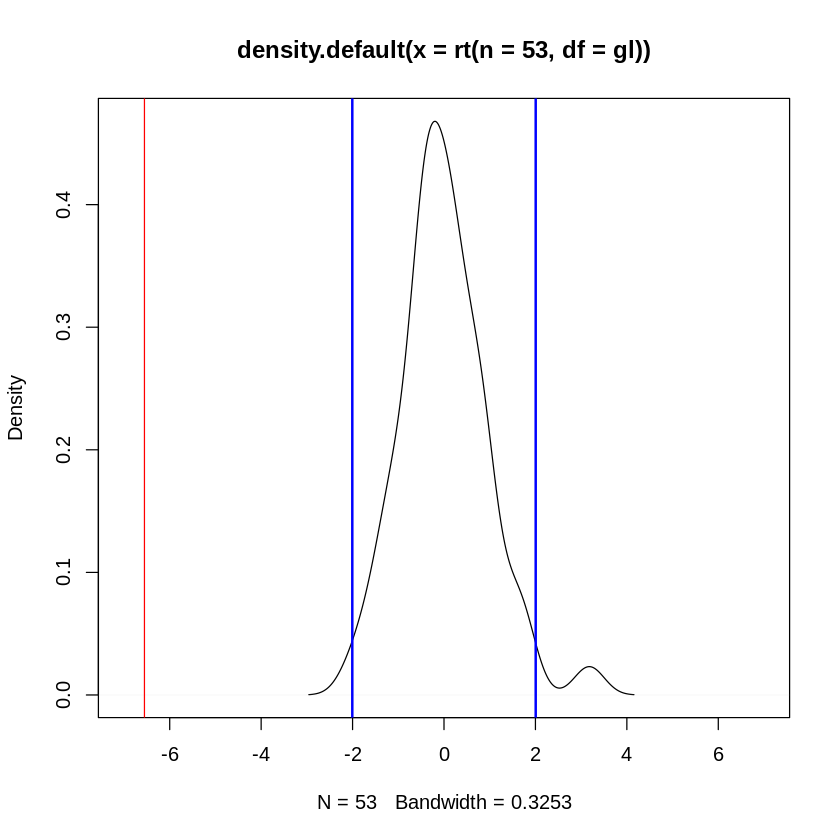

In [125]:
# Observe onde estão os valores críticos que acabamos de encontrar

plot(density(rt(n = 53,df = gl)),xlim = c(-7,7)) 
abline(v = quantil,col = 'blue',lwd = 2)
abline(v = -quantil,col = 'blue',lwd = 2)
abline(v = t, col = 'red') # Observe como o tcalculado é muito menor que o tcrítico. Estána região de rejeição

In [126]:
# Obtendo o valor p
# P(Tcalculado > Tcritico)
2*pt(q = t, df = gl)

[1] 2.403372e-08

In [127]:
# Agora vamos realizar o mesmo teste de hipótese utilizando a função nativa do R t.test()
vendas_A <- rnorm(n= 25, mean = 150.1, sd = 17)
vendas_B <- rnorm(n = 30, mean = 182.1, sd = 19.2)

In [128]:
#Observe no output desta função, que ela já nos da tudo pronto, t calculado e valor p
t.test(vendas_A,vendas_B, alternative = 'two.sided')


	Welch Two Sample t-test

data:  vendas_A and vendas_B
t = -5.2432, df = 50.174, p-value = 3.168e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -40.76536 -18.18476
sample estimates:
mean of x mean of y 
 154.6799  184.1549 


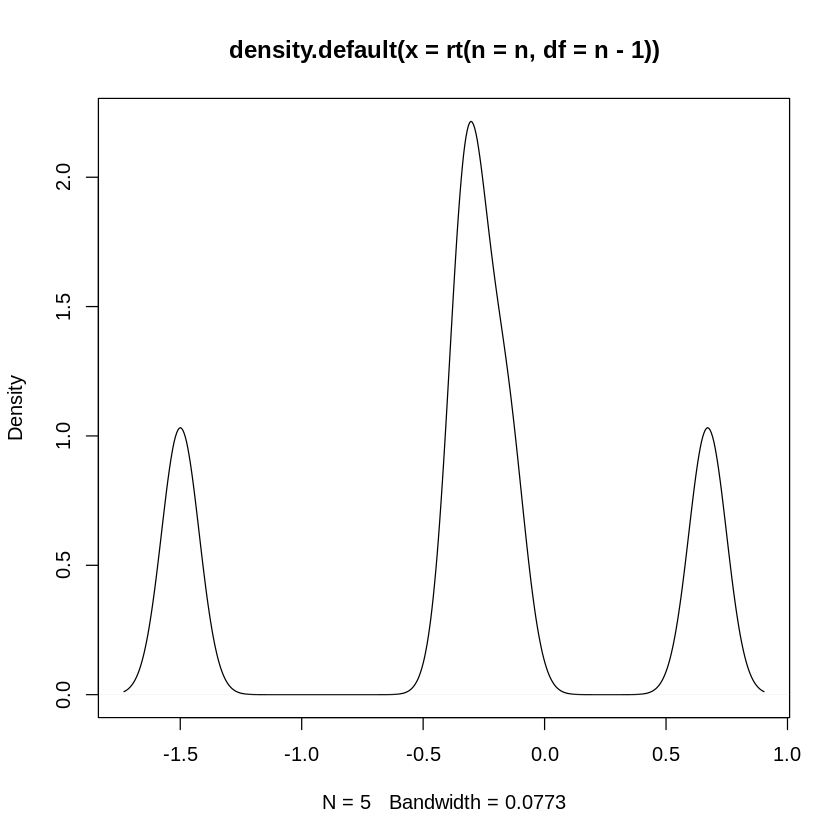

In [129]:
#Esse é o aspecto de uma distribuição t com n observações e com n - 1 graus de liberdade
n <- 5
plot(density(rt(n = n,df = n-1)))

In [130]:
# Altere o valor de n de 5 em 5 observe que a medida que os graus de liberdade aumenta a distribuição se aproxima da normal. Como os valores são gerados 
# aleatoriamente poderemos ter curvas diferentes para um mesmo valor de n, mas a medida que n cresce o comportamento simétrico tende a estabilizar.

# Teste t para diferença de médias (duas amostras dependentes) 

In [131]:
# Iremos simular o exemplo da apostila
# H0: O peso médio após a dieta é igual ao peso médio antes da dieta
# H1: O peso médio após a dieta é menor do que o peso médio antes da dieta

In [132]:
# Iremos utilizar uma biblioteca adicional para gerar valores aleatórios que sigam uma distribuição normal entre um intervalo de valor para simular os pesos
# A biblioteca chama 'truncnorm'.
install.packages('truncnorm')
library(truncnorm)
set.seed(100)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [133]:
# Gera uma amostra aleatória, seguindo uma distribuição normal cujo valor mínimo é 100 e o valor máximo é 140.
# O valor de n=20, média = 123 e desvio padrão 18
# Com essa v.a. iremos simular os pesos dos indivíduos antes da dieta
antes_da_dieta <- rtruncnorm(n=20, a=100, b=140, mean=123, sd=18)

In [134]:
# Gera uma amostra aleatória, seguindo uma distribuição normal cujo valor mínimo é 110 e o valor máximo é 130.
# O valor de n=20, média = 110 e desvio padrão 28
# Com essa v.a. iremos simular os pesos dos indivíduos após a dieta
depois_da_dieta <- rtruncnorm(n=20, a=110, b=130, mean=110, sd=28)

In [135]:
#Calcula a diferença depois da dieta e antes da dieta, para cada indivíduo
diferenca <- depois_da_dieta-antes_da_dieta

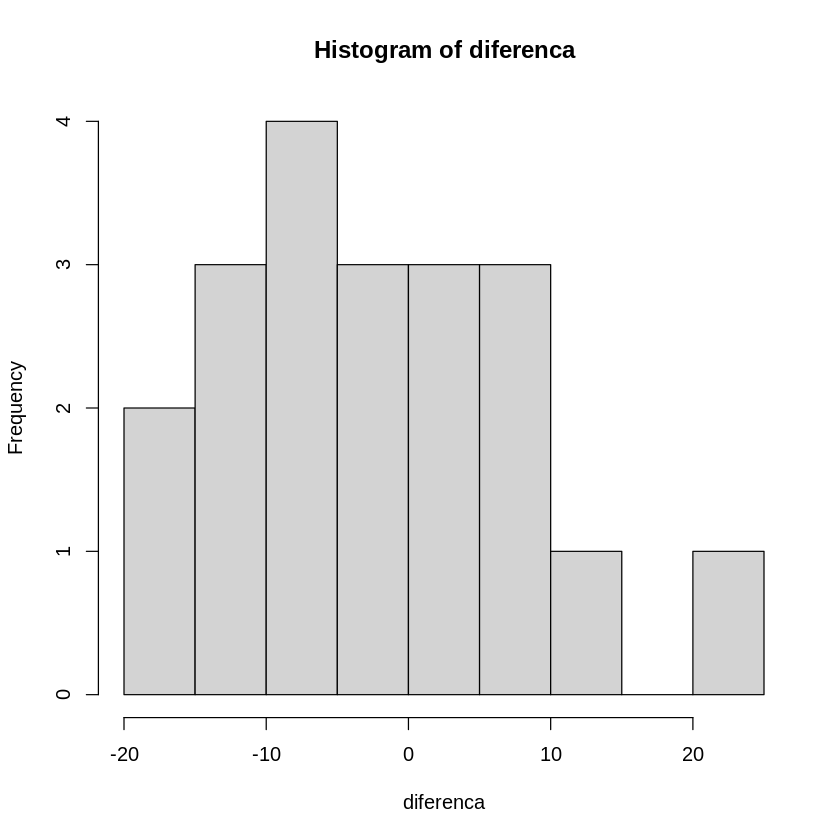

In [136]:
#Visualiza a distribuicao da diferença de pesos
hist(diferenca)

In [137]:
shapiro.test(diferenca) #Avalie a normalidade da distribuição da diferença


	Shapiro-Wilk normality test

data:  diferenca
W = 0.9697, p-value = 0.7485


In [138]:
#Aplica test t com os seguintes argumentos
t.test(depois_da_dieta,antes_da_dieta,
 paired = TRUE, #Pareado
 alternative = "less", #Unilateral a esquerda
 conf.level = 0.9 #90 porcento de confiança
 ) #O comando t.test() acima nos da tudo que precisamos para executar e concluir o teste. 


	Paired t-test

data:  depois_da_dieta and antes_da_dieta
t = -0.95449, df = 19, p-value = 0.1759
alternative hypothesis: true mean difference is less than 0
90 percent confidence interval:
      -Inf 0.8496348
sample estimates:
mean difference 
      -2.172799 


In [139]:
# Calcula a média das diferenças
media <- mean(diferenca)
# Desvio padrão das diferenças
desvio_padrao <- sd(diferenca)
# Quantidade de indivíduos
n <- 20
# Obtem o t calculado
t_calculado <- media / (desvio_padrao/sqrt(n))


In [140]:
# Obtem o valor p para o t calculado com n - 1 graus de liberdade. 
pt(q = t_calculado, df = n-1)
# Podemos também obter o t crítico para uma distribuição t com 19 (n-1=20-1) graus de liberdade ao nível de confiança de 90%
tcrítico_teste_t_pareado <- -qt(p = 0.9, df = 19) #Devido ao teste ser unilateral a esquerda a distribuição t ser simétrica, nossa estatística de teste será negativa
# Observe que o t calculado é maior que o t critico. Como estamos em um teste unilateral a esquerda o t calculado estará fora da região de rejeição caso seja 
# maior que o t crítico
t_calculado < tcrítico_teste_t_pareado

[1] 0.1759111

[1] FALSE

# Teste Qui-Quadrado para associação entre variáveis categóricas

In [141]:
# H0: O fato do cliente estar ou não com criança não tem relação com o fato de comprar ou não comprar
# H1: O fato do cliente estar ou não com criança tem relação com fato de comprar ou não comprar

In [142]:
dados <- data.frame(

 Cliente = c("Adulto_com_Crianca", "Adulto_com_Crianca", "Adulto_com_Crianca",
 "Adulto", "Adulto", "Adulto", "Adulto_com_Crianca", "Adulto_com_Crianca",
 "Adulto_com_Crianca", "Adulto_com_Crianca", "Adulto_com_Crianca",
 "Adulto_com_Crianca", "Adulto_com_Crianca", "Adulto_com_Crianca",
 "Adulto_com_Crianca", "Adulto_com_Crianca", "Adulto_com_Crianca",
 "Adulto_com_Crianca", "Adulto_com_Crianca", "Adulto_com_Crianca",
 "Adulto_com_Crianca", "Adulto_com_Crianca", "Adulto_com_Crianca",
 "Adulto_com_Crianca", "Adulto", "Adulto", "Adulto", "Adulto",
 "Adulto_com_Crianca", "Adulto_com_Crianca", "Adulto_com_Crianca",
 "Adulto_com_Crianca", "Adulto", "Adulto_com_Crianca", "Adulto",
 "Adulto", "Adulto_com_Crianca", "Adulto_com_Crianca", "Adulto_com_Crianca",
 "Adulto", "Adulto_com_Crianca", "Adulto", "Adulto", "Adulto",
 "Adulto","Adulto","Adulto","Adulto","Adulto","Adulto"),

 Comprou = c("Não_Comprou", "Não_Comprou", "Não_Comprou", "Não_Comprou",
 "Não_Comprou", "Não_Comprou", "Comprou", "Comprou", "Comprou",
 "Comprou", "Comprou", "Comprou", "Comprou", "Comprou", "Comprou",
 "Comprou", "Comprou", "Comprou", "Comprou", "Comprou", "Comprou",
 "Comprou", "Comprou", "Comprou", "Não_Comprou", "Não_Comprou",
 "Não_Comprou", "Não_Comprou", "Comprou", "Não_Comprou", "Comprou",
 "Comprou", "Não_Comprou", "Não_Comprou", "Não_Comprou",
 "Não_Comprou",  "Não_Comprou", "Comprou", "Comprou", "Não_Comprou", 
 "Não_Comprou",  "Não_Comprou", "Não_Comprou", "Não_Comprou",
 "Comprou","Comprou","Comprou","Comprou","Comprou","Comprou")
)

#Visualiza o conjunto de dados
View(dados)

Cliente,Comprou
<chr>,<chr>
Adulto_com_Crianca,Não_Comprou
Adulto_com_Crianca,Não_Comprou
Adulto_com_Crianca,Não_Comprou
Adulto,Não_Comprou
Adulto,Não_Comprou
Adulto,Não_Comprou
Adulto_com_Crianca,Comprou
Adulto_com_Crianca,Comprou
Adulto_com_Crianca,Comprou


In [143]:
# Gera tabela de contigência 2x2
tabela <- table(dados$Cliente,dados$Comprou)
tabela

                    
                     Comprou Não_Comprou
  Adulto                   6          14
  Adulto_com_Crianca      23           7

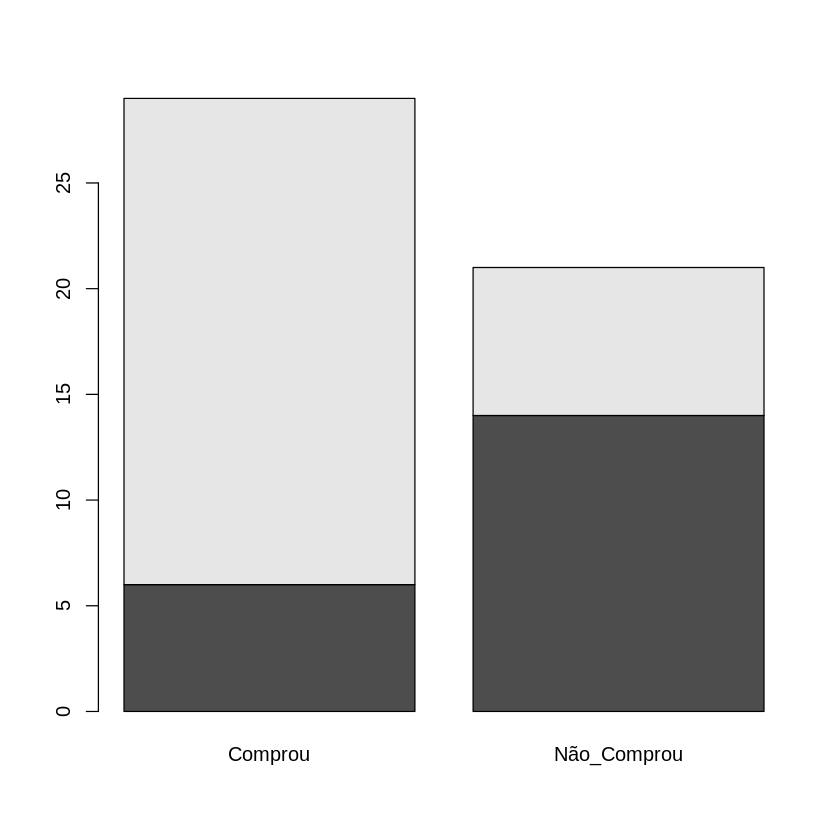

In [144]:
barplot(tabela)

In [145]:
#O valor críticico para uma distribuição qui-quadrado com (linhas-1)*(colunas-1)=1 grau de liberdade ao nível de confiança de 95%
qchisq(p=0.95,df = 1)

[1] 3.841459

In [146]:
#O valor p unilateral fica
1-pchisq(q=10.728,df=1) #Mesmo que o nível de confiança fosse 99%, ainda teríamos evidências para rejeitar H0

[1] 0.001055264

In [147]:
#Assim como fizemos no test t, podemos usar um comando direto no R para realizar o teste qui-quadrado chisq.test()
teste<-chisq.test(tabela,correct = F)
teste


	Pearson's Chi-squared test

data:  tabela
X-squared = 10.728, df = 1, p-value = 0.001055


In [148]:
#Visualiza valores observados. Que nada mais é do que a tabela original
teste$observed

                    
                     Comprou Não_Comprou
  Adulto                   6          14
  Adulto_com_Crianca      23           7

In [149]:
#Visualiza valores esperados
teste$expected

,Comprou,Não_Comprou
Adulto,11.6,8.4
Adulto_com_Crianca,17.4,12.6


#  ANOVA

In [150]:
#H0: Não há diferença no valor médio gasto com bebidas em nenhuma das populações
#H1: Há diferença no valor médio gasto com bebidas em pelo menos uma das populações

In [151]:
#Gera um data frame contendo os dados da pesquisa
dados_anova <- data.frame(
  Gastos = c(174.770021661909, 161.329206619394,
  153.679900850863, 163.790338797433, 141.363480335882,
  175.351592994046, 185.793398289321, 184.720273514352, 
  163.400459287948, 170.202462740626, 150.8549565713, 
  167.583106239899, 140.190492201897, 157.440088617225,
  171.596654773339, 138.885665257324, 147.942698809323,
  9.87474262516482, 50.5645554670016, 14.2586307887884, 
  8.5061846804934,  25.0875496696788, 17.0661987504312, 
  41.3867417301938, 20.8113941426179, 60.1224674502026,
  35.5154028285664, 23.7622285692359, 34.6086119259266,
  30.4321086925016, 27.8188980544904, 37.4729772794009, 
  30.7229538650678, 48.0452539322412, 78.9197865324734, 
  42.4926762466659, 8.81227865272712, 39.5751781629677,
  37.1329656327517, 15.8016718071775, 5.74735216885902,
  38.684069121093,  30.9398891106907, 34.7370783113952, 
  13.2630510987537, 19.6212096123791, 16.716945267481, 
  24.4037922212213, 4.63398786180773, 32.9436217626275,
  21.511905851158,  31.4997283634204, 26.6610570873775,
  34.6304034101472, 16.2704826042681, 11.2323425300881, 
  18.023244405391,  15.4790632095655, 8.25633422881043, 
  27.9053307974433, 72.3298402892867, 4.7263338963663,
  14.4153129255327, 41.2234268777169, 50.5684226296565,
  19.8344282661234, 8.81306901471397, 19.5112436004646, 
  55.6251926080436, 16.7592556127806, 20.3176176298076,
  31.2073058210955, 17.0613250010048, 47.8590627884627,
  2.59778754862417, 35.9470130480825, 2.39404093355522,
  9.38425601777391, 25.2455048267186, 16.1960287769175,
  43.530118783298,  32.7250288712979, 5.43268078364765, 
  44.5365791890593, 32.9831443965413, 28.2104605365607,
  3.18609515001209, 14.3698142789208, 39.9617218607622,
  50.564581262513,  10.4634451365926, 36.4842442182048, 
  13.1330189654278, 8.93702642184252, 12.1501174131844, 
  22.2552757873296, 15.1407470062459, 11.7525513477354,
  16.2990775324815, 24.4627568806115, 2.87916580644454,
  44.5453919973285, 38.0393535792355, 32.1985589022666, 
  0.357075783631849,22.0703974352325, 50.7486034030794, 
  18.604230207709,  5.83122133978906, 19.9252025339318, 
  6.8366108202567,  27.5834177510951, 41.9303025963975,
  3.077799353254,   28.0507001837521, 33.0042729903, 
  50.7366690908169, 30.1697285113061, 6.53184416916073, 
  7.53469171526227, 5.49225229796712, 9.53198727121377,
  6.59266645551752, 19.8423174628847, 0.781567028951091,
  22.1605754480815, 5.90830712162365, 54.3457453874529, 
  33.3341495203441, 37.2034845899045), 
  Estado_Civil = c("solteiros", "solteiros", "solteiros", "solteiros",
 "solteiros", "solteiros", "solteiros", "solteiros", "solteiros",
 "solteiros", "solteiros", "solteiros", "solteiros", "solteiros",
 "solteiros", "solteiros", "solteiros", "Casados", "Casados",
 "Casados", "Casados", "Casados", "Casados", "Casados", "Casados",
 "Casados", "Casados", "Casados", "Casados", "Casados", "Casados",
 "Casados", "Casados", "Casados", "Casados", "Casados", "Casados",
 "Casados", "Casados", "Casados", "Casados", "Casados", "Casados",
 "Casados", "Casados", "Casados", "Casados", "Casados", "Casados",
 "Casados", "Casados", "Casados", "Casados", "Casados", "Casados", 
 "Casados", "Casados", "Casados", "Casados", "Casados", "Casados",
 "Casados", "Casados", "Casados", "Casados", "Casados", "Casados",
 "Casados", "Casados", "Casados", "Casados", "Casados", "Casados",
 "Casados", "Casados", "Casados", "Casados", "Casados", "Casados",
 "Casados", "Casados", "Casados", "Casados", "Casados", "Casados",
 "Casados", "Casados", "Casados", "Casados", "Casados", "Casados",
 "Casados", "Casados", "Casados", "Casados", "Casados", "Casados",
 "Casados", "Casados", "Casados", "Casados", "Casados", "Casados",
 "Casados", "Casados", "Casados", "Casados", "Casados", "Casados",
 "Casados", "Casados", "Casados", "Casados", "Casados", "Casados",
 "Divorciados", "Divorciados", "Divorciados", "Divorciados", "Divorciados",
 "Divorciados", "Divorciados", "Divorciados", "Divorciados", "Divorciados",
 "Divorciados", "Divorciados", "Divorciados", "Divorciados", "Divorciados"))

#Visualiza o conjunto de dados
View(dados_anova)

Gastos,Estado_Civil
<dbl>,<chr>
174.770022,solteiros
161.329207,solteiros
153.679901,solteiros
163.790339,solteiros
141.363480,solteiros
175.351593,solteiros
185.793398,solteiros
184.720274,solteiros
163.400459,solteiros


In [152]:
# Utilizaremos os recursos de visualização da biblioteca ggplot2 para visualizar a distribuição dos gastos nas populações
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [153]:
library(ggplot2)


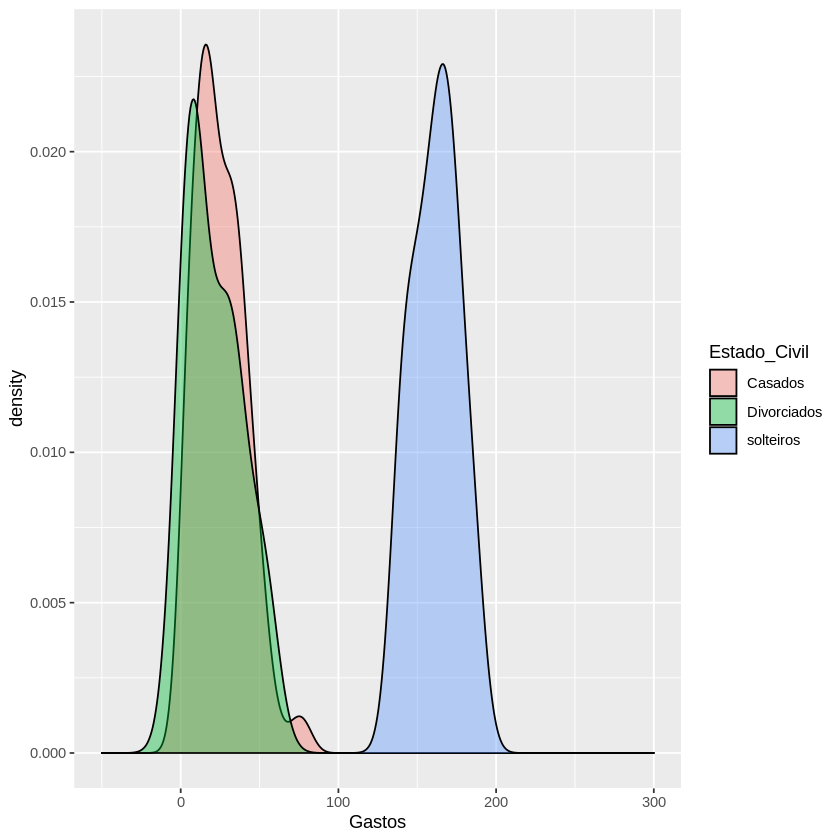

In [154]:
ggplot(data = dados_anova, aes(x = Gastos, fill = Estado_Civil)) +
 geom_density(alpha=0.4)+
 xlim(-50,300)

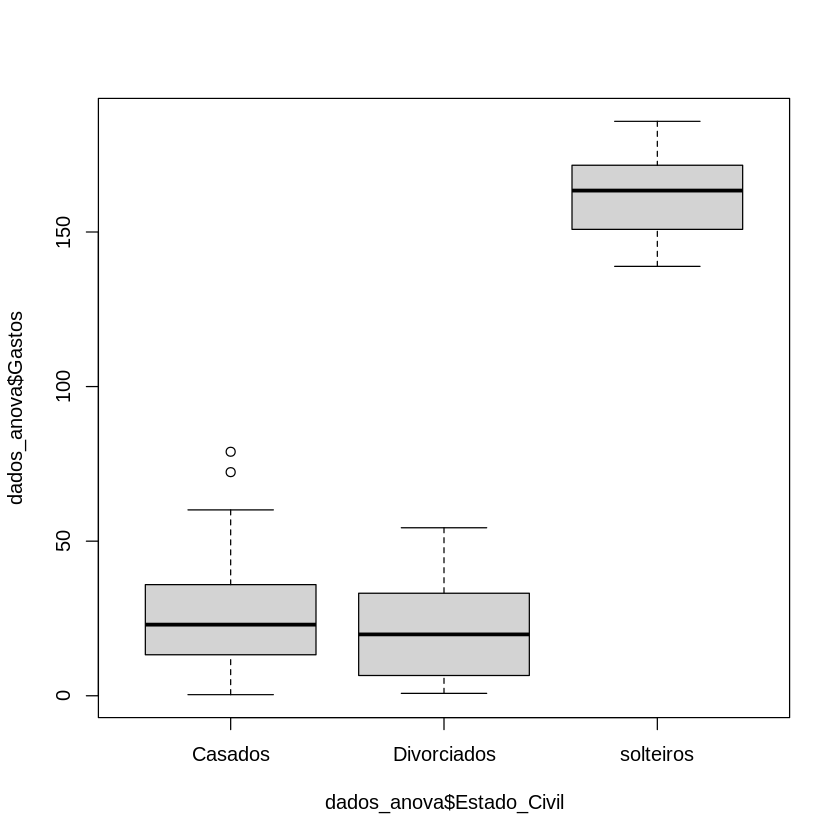

In [155]:
# É bastante comum também analisarmos a variabilidade nas distintas populações com uso de boxplot
boxplot(dados_anova$Gastos ~ dados_anova$Estado_Civil)

In [156]:
# Com o comando aov(), o R gera a tabela da ANOVA completa
anova <- aov(Gastos~ #Variável resposta
 Estado_Civil, #Fator que queremos testar se exerce influencia na variável resposta
 data = dados_anova)

In [157]:
# Visualize a tabela da ANOVA. Observe o F calculado e o valor p ( Pr > F)
summary(anova)

# O valor p é praticamente zero. Mesmo que nosso nível de confiança fosse 99,9% ainda teríamos evidências para rejeitar H0

              Df Sum Sq Mean Sq F value Pr(>F)    
Estado_Civil   2 276639  138319   537.8 <2e-16 ***
Residuals    127  32665     257                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1